In [2]:
from glob import glob

path_to_image_folders = glob('../../data/Outdir/*/')
path_to_image_folders[:5]

['../../data/Outdir\\BraTS20_Training_001\\',
 '../../data/Outdir\\BraTS20_Training_002\\',
 '../../data/Outdir\\BraTS20_Training_003\\',
 '../../data/Outdir\\BraTS20_Training_004\\',
 '../../data/Outdir\\BraTS20_Training_005\\']

In [4]:
id = list(range(1, 101, 1))
id[:5]

[1, 2, 3, 4, 5]

In [5]:
import pandas as pd

df = pd.DataFrame({
    'id': id,
    'path': path_to_image_folders
})

df

,id,path
0,1,../../data/Outdir\BraTS20_Training_001\
1,2,../../data/Outdir\BraTS20_Training_002\
2,3,../../data/Outdir\BraTS20_Training_003\
3,4,../../data/Outdir\BraTS20_Training_004\
4,5,../../data/Outdir\BraTS20_Training_005\
...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\
96,97,../../data/Outdir\BraTS20_Training_097\
97,98,../../data/Outdir\BraTS20_Training_098\
98,99,../../data/Outdir\BraTS20_Training_099\


## Calculating the correct slice

### Region 1

In [13]:
import btseg.transformers as t
import cv2

transforms_region_1 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=1),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1)
])

In [50]:
import matplotlib.pyplot as plt

max_slice_1 = []

for value in df.values:
    id, path = value
    
    images = glob(f'{path}/*')
    max_area = 0
    max_slice_path = None
    
    for image_path in images:
        image = cv2.imread(image_path)
        transformed_image = transforms_region_1(image)
        
        # plt.imshow(transformed_image)
        cnts, _ = cv2.findContours(transformed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # calculate contour areas
        cnts_areas = [(cv2.contourArea(c), c) for c in cnts]
        maximum_contour = max(cnts_areas, key=lambda x: x[0]) if cnts_areas != [] else (0, None)
        
        if maximum_contour[0] >= max_area:
            max_area = maximum_contour[0]
            max_slice_path = image_path
            
    max_slice_1.append(max_slice_path)
    
df['slice_1_path'] = max_slice_1

In [51]:
df

,id,path,slice_1_path
0,1,../../data/Outdir\BraTS20_Training_001\,../../data/Outdir\BraTS20_Training_001\94.png
1,2,../../data/Outdir\BraTS20_Training_002\,../../data/Outdir\BraTS20_Training_002\87.png
2,3,../../data/Outdir\BraTS20_Training_003\,../../data/Outdir\BraTS20_Training_003\150.png
3,4,../../data/Outdir\BraTS20_Training_004\,../../data/Outdir\BraTS20_Training_004\148.png
4,5,../../data/Outdir\BraTS20_Training_005\,../../data/Outdir\BraTS20_Training_005\154.png
...,...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\,../../data/Outdir\BraTS20_Training_096\96.png
96,97,../../data/Outdir\BraTS20_Training_097\,../../data/Outdir\BraTS20_Training_097\90.png
97,98,../../data/Outdir\BraTS20_Training_098\,../../data/Outdir\BraTS20_Training_098\107.png
98,99,../../data/Outdir\BraTS20_Training_099\,../../data/Outdir\BraTS20_Training_099\148.png


### Region 2

In [52]:
transforms_region_2 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=2),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1)
])

In [54]:
max_slice_2 = []

for value in df.values:
    id, path = value[0], value[1]
    
    images = glob(f'{path}/*')
    max_area = 0
    max_slice_path = None
    
    for image_path in images:
        image = cv2.imread(image_path)
        transformed_image = transforms_region_2(image)
        
        # plt.imshow(transformed_image)
        cnts, _ = cv2.findContours(transformed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # calculate contour areas
        cnts_areas = [(cv2.contourArea(c), c) for c in cnts]
        maximum_contour = max(cnts_areas, key=lambda x: x[0]) if cnts_areas != [] else (0, None)
        
        if maximum_contour[0] >= max_area:
            max_area = maximum_contour[0]
            max_slice_path = image_path
            
    max_slice_2.append(max_slice_path)
    
df['slice_2_path'] = max_slice_2

In [56]:
transforms_region_3 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=3),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1)
])

In [57]:
max_slice_3 = []

for value in df.values:
    id, path = value[0], value[1]
    
    images = glob(f'{path}/*')
    max_area = 0
    max_slice_path = None
    
    for image_path in images:
        image = cv2.imread(image_path)
        transformed_image = transforms_region_2(image)
        
        # plt.imshow(transformed_image)
        cnts, _ = cv2.findContours(transformed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # calculate contour areas
        cnts_areas = [(cv2.contourArea(c), c) for c in cnts]
        maximum_contour = max(cnts_areas, key=lambda x: x[0]) if cnts_areas != [] else (0, None)
        
        if maximum_contour[0] >= max_area:
            max_area = maximum_contour[0]
            max_slice_path = image_path
            
    max_slice_3.append(max_slice_path)
    
df['slice_3_path'] = max_slice_3

In [60]:
df.to_csv('./btseg.csv', index=False)

## Transforming

In [6]:
import cv2
import pandas as pd
import numpy as np
import btseg.transformers as t
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('./btseg.csv')
df

,id,nii_path,slice_path
0,1,../../data/Outdir\BraTS20_Training_001\,../../data/Outdir\BraTS20_Training_001\94.png
1,2,../../data/Outdir\BraTS20_Training_002\,../../data/Outdir\BraTS20_Training_002\87.png
2,3,../../data/Outdir\BraTS20_Training_003\,../../data/Outdir\BraTS20_Training_003\150.png
3,4,../../data/Outdir\BraTS20_Training_004\,../../data/Outdir\BraTS20_Training_004\148.png
4,5,../../data/Outdir\BraTS20_Training_005\,../../data/Outdir\BraTS20_Training_005\154.png
...,...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\,../../data/Outdir\BraTS20_Training_096\96.png
96,97,../../data/Outdir\BraTS20_Training_097\,../../data/Outdir\BraTS20_Training_097\90.png
97,98,../../data/Outdir\BraTS20_Training_098\,../../data/Outdir\BraTS20_Training_098\107.png
98,99,../../data/Outdir\BraTS20_Training_099\,../../data/Outdir\BraTS20_Training_099\148.png


In [3]:
df_1 = pd.DataFrame()
df_1['id'] = df['id'] 
df_1

,id
0,1
1,2
2,3
3,4
4,5
...,...
95,96
96,97
97,98
98,99


In [6]:
for i in range(720):
    df_1[f'{i}'] = None
df_1

,id,0,1,2,3,4,5,6,7,8,...,710,711,712,713,714,715,716,717,718,719
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,97,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,98,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,99,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Transforming region 1

In [9]:
transforms_region_1 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=1),
    t.Resize(proportion_scale=True, g_measure=700),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
    t.MinimumBoundingBox(),
])

In [50]:
import math

for val in df.values:
    
    id, path = val[0], val[2]
    image = cv2.imread(path)
    image_transformed = transforms_region_1(image)

    contours, _ = cv2.findContours(image_transformed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours_areas = [(cv2.contourArea(c), c) for c in contours]
    maximum_contour = max(contours_areas, key=lambda x: x[0])
    
    ref = np.zeros_like(image_transformed)
    cv2.drawContours(ref, [maximum_contour[1]], 0, 255, 1)
    
    M = cv2.moments(ref)
    centroid_x = int(M['m10']/M['m00'])
    centroid_y = int(M['m01']/M['m00'])
    
    width = image_transformed.shape[1]
    height = image_transformed.shape[0]

    distances = []
    N = 360

    for i in np.arange(0, N, 1):
        tmp = np.zeros_like(image_transformed)
        theta = i*(360/N)
        theta *= np.pi/180.0
        cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

        (row, col) = np.nonzero(np.logical_and(tmp, ref))

#         cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
        try:
            distance = math.sqrt(
                ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
            )
            distances.append(distance)
        except:
            distances.append(None)
            
    
    distances = distances + distances
    for index, d in enumerate(distances):
        df_1.loc[df_1['id'] == id, f'{index}'] = d

In [52]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 721 entries, id to 719
dtypes: int64(1), object(720)
memory usage: 563.4+ KB


In [3]:
df = pd.read_csv('./btseg.csv')
df

,id,path,slice_1_path,slice_2_path,slice_3_path
0,1,../../data/Outdir\BraTS20_Training_001\,../../data/Outdir\BraTS20_Training_001\94.png,../../data/Outdir\BraTS20_Training_001\65.png,../../data/Outdir\BraTS20_Training_001\65.png
1,2,../../data/Outdir\BraTS20_Training_002\,../../data/Outdir\BraTS20_Training_002\87.png,../../data/Outdir\BraTS20_Training_002\97.png,../../data/Outdir\BraTS20_Training_002\97.png
2,3,../../data/Outdir\BraTS20_Training_003\,../../data/Outdir\BraTS20_Training_003\150.png,../../data/Outdir\BraTS20_Training_003\150.png,../../data/Outdir\BraTS20_Training_003\150.png
3,4,../../data/Outdir\BraTS20_Training_004\,../../data/Outdir\BraTS20_Training_004\148.png,../../data/Outdir\BraTS20_Training_004\147.png,../../data/Outdir\BraTS20_Training_004\147.png
4,5,../../data/Outdir\BraTS20_Training_005\,../../data/Outdir\BraTS20_Training_005\154.png,../../data/Outdir\BraTS20_Training_005\154.png,../../data/Outdir\BraTS20_Training_005\154.png
...,...,...,...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\,../../data/Outdir\BraTS20_Training_096\96.png,../../data/Outdir\BraTS20_Training_096\101.png,../../data/Outdir\BraTS20_Training_096\101.png
96,97,../../data/Outdir\BraTS20_Training_097\,../../data/Outdir\BraTS20_Training_097\90.png,../../data/Outdir\BraTS20_Training_097\89.png,../../data/Outdir\BraTS20_Training_097\89.png
97,98,../../data/Outdir\BraTS20_Training_098\,../../data/Outdir\BraTS20_Training_098\107.png,../../data/Outdir\BraTS20_Training_098\86.png,../../data/Outdir\BraTS20_Training_098\86.png
98,99,../../data/Outdir\BraTS20_Training_099\,../../data/Outdir\BraTS20_Training_099\148.png,../../data/Outdir\BraTS20_Training_099\148.png,../../data/Outdir\BraTS20_Training_099\148.png


In [4]:
df.drop(['slice_2_path', 'slice_3_path'], axis=1, inplace=True)
df

,id,path,slice_1_path
0,1,../../data/Outdir\BraTS20_Training_001\,../../data/Outdir\BraTS20_Training_001\94.png
1,2,../../data/Outdir\BraTS20_Training_002\,../../data/Outdir\BraTS20_Training_002\87.png
2,3,../../data/Outdir\BraTS20_Training_003\,../../data/Outdir\BraTS20_Training_003\150.png
3,4,../../data/Outdir\BraTS20_Training_004\,../../data/Outdir\BraTS20_Training_004\148.png
4,5,../../data/Outdir\BraTS20_Training_005\,../../data/Outdir\BraTS20_Training_005\154.png
...,...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\,../../data/Outdir\BraTS20_Training_096\96.png
96,97,../../data/Outdir\BraTS20_Training_097\,../../data/Outdir\BraTS20_Training_097\90.png
97,98,../../data/Outdir\BraTS20_Training_098\,../../data/Outdir\BraTS20_Training_098\107.png
98,99,../../data/Outdir\BraTS20_Training_099\,../../data/Outdir\BraTS20_Training_099\148.png


In [5]:
df.columns = ['id', 'nii_path', 'slice_path']
df

,id,nii_path,slice_path
0,1,../../data/Outdir\BraTS20_Training_001\,../../data/Outdir\BraTS20_Training_001\94.png
1,2,../../data/Outdir\BraTS20_Training_002\,../../data/Outdir\BraTS20_Training_002\87.png
2,3,../../data/Outdir\BraTS20_Training_003\,../../data/Outdir\BraTS20_Training_003\150.png
3,4,../../data/Outdir\BraTS20_Training_004\,../../data/Outdir\BraTS20_Training_004\148.png
4,5,../../data/Outdir\BraTS20_Training_005\,../../data/Outdir\BraTS20_Training_005\154.png
...,...,...,...
95,96,../../data/Outdir\BraTS20_Training_096\,../../data/Outdir\BraTS20_Training_096\96.png
96,97,../../data/Outdir\BraTS20_Training_097\,../../data/Outdir\BraTS20_Training_097\90.png
97,98,../../data/Outdir\BraTS20_Training_098\,../../data/Outdir\BraTS20_Training_098\107.png
98,99,../../data/Outdir\BraTS20_Training_099\,../../data/Outdir\BraTS20_Training_099\148.png


In [6]:
df.to_csv('./btseg.csv', index=False)

In [10]:
df_2 = pd.DataFrame()
df_2['id'] = df['id']
for i in range(720):
    df_2[f'{i}'] = None
df_2

,id,0,1,2,3,4,5,6,7,8,...,710,711,712,713,714,715,716,717,718,719
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,97,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,98,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,99,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
transforms_region_2 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=2),
    t.Resize(proportion_scale=True, g_measure=700),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
    t.MinimumBoundingBox(),
])

In [12]:
import math

for val in df.values:
    id, path = val[0], val[2]
    image = cv2.imread(path)
    image_transformed = transforms_region_2(image)

    contours, _ = cv2.findContours(image_transformed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours_areas = [(cv2.contourArea(c), c) for c in contours]
    maximum_contour = max(contours_areas, key=lambda x: x[0])
    
    ref = np.zeros_like(image_transformed)
    cv2.drawContours(ref, [maximum_contour[1]], 0, 255, 1)
    
    M = cv2.moments(ref)
    centroid_x = int(M['m10']/M['m00'])
    centroid_y = int(M['m01']/M['m00'])
    
    width = image_transformed.shape[1]
    height = image_transformed.shape[0]

    distances = []
    N = 360

    for i in np.arange(0, N, 1):
        tmp = np.zeros_like(image_transformed)
        theta = i*(360/N)
        theta *= np.pi/180.0
        cv2.line(tmp, (centroid_x, centroid_y),
           (int(centroid_x+np.cos(theta) * width),
            int(centroid_y-np.sin(theta) * height)), 255, 5)

        (row, col) = np.nonzero(np.logical_and(tmp, ref))

#         cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
        try:
            distance = math.sqrt(
                ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
            )
            distances.append(distance)
        except:
            distances.append(None)
            
    
    distances = distances + distances
    for index, d in enumerate(distances):
        df_2.loc[df_2['id'] == id, f'{index}'] = d

In [13]:
df_2

,id,0,1,2,3,4,5,6,7,8,...,710,711,712,713,714,715,716,717,718,719
0,1,51.088159,51.156622,49.36598,49.497475,48.6621,48.836462,48.052055,48.507731,48.764741,...,49.819675,49.648766,49.497475,49.254441,49.162994,49.091751,49.040799,50.0,51.009803,51.039201
1,2,29.154759,29.274562,29.274562,29.427878,29.614186,29.614186,29.832868,29.832868,30.364453,...,32.140317,32.140317,31.064449,30.016662,30.016662,30.0,29.017236,29.017236,29.068884,29.154759
2,3,42.107007,42.190046,42.296572,42.426407,42.579338,42.755117,42.953463,43.174066,52.392748,...,37.336309,37.215588,37.121422,37.121422,37.054015,38.013156,39.0,39.0,42.011903,42.047592
3,4,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,...,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641,4.242641
4,5,29.154759,29.274562,29.274562,29.427878,29.427878,29.614186,29.614186,29.832868,29.832868,...,33.136083,33.060551,33.060551,33.015148,32.0,32.0,31.016125,30.066593,30.066593,29.154759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,57.078893,56.142675,55.226805,53.338541,52.469038,51.623638,50.803543,50.009999,49.244289,...,57.428216,57.428216,57.31492,57.218878,57.140179,57.035077,57.008771,57.0,57.008771,57.035077
96,97,73.061618,73.171033,73.334848,73.437048,73.681748,72.835431,71.19691,71.386273,70.830784,...,77.278716,76.941536,76.791927,76.531039,76.321688,76.164296,75.106591,73.027392,73.0,73.027392
97,98,55.081757,54.147945,53.338541,52.345009,52.611786,52.611786,51.78803,51.971146,51.195703,...,61.66036,60.406953,60.406953,60.207973,59.135438,58.077534,58.034473,57.0,57.008771,56.035703
98,99,17.262677,17.464249,17.720045,17.720045,18.027756,18.027756,18.384776,18.788294,19.235384,...,19.416488,17.117243,17.117243,17.029386,17.029386,17.0,17.0,17.029386,17.117243,17.117243


In [14]:
df_2.to_csv('region_2_ts.csv', index=False)

In [15]:
df_3 = pd.DataFrame()
df_3['id'] = df['id']
for i in range(720):
    df_3[f'{i}'] = None
df_3

,id,0,1,2,3,4,5,6,7,8,...,710,711,712,713,714,715,716,717,718,719
0,1,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
96,97,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
97,98,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
98,99,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
transforms_region_3 = t.Compose([
    t.ConvertColor(conversion_code=cv2.COLOR_BGR2GRAY),
    t.RegionSelection(region=3),
    t.Resize(proportion_scale=True, g_measure=700),
    t.GaussianBlur(kernel_size=(7, 7), sigma_x=0),
    t.CannyEdge(threshold_1=50, threshold_2=100),
    t.Dilate(kernel=None, iterations=1),
    t.Erode(kernel=None, iterations=1),
#     t.MinimumBoundingBox(),
])

In [24]:
import math

image = cv2.imread('../../data/Outdir/BraTS20_Training_001/73.png')
image_transformed = transforms_region_3(image)

contours, _ = cv2.findContours(image_transformed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours_areas = [(cv2.contourArea(c), c) for c in contours]
maximum_contour = max(contours_areas, key=lambda x: x[0])

ref = np.zeros_like(image_transformed)
cv2.drawContours(ref, [maximum_contour[1]], 0, 255, 1)

M = cv2.moments(ref)
centroid_x = int(M['m10']/M['m00'])
centroid_y = int(M['m01']/M['m00'])

width = image_transformed.shape[1]
height = image_transformed.shape[0]

distances = []
N = 360

for i in np.arange(0, N, 1):
    tmp = np.zeros_like(image_transformed)
    theta = i*(360/N)
    theta *= np.pi/180.0
    cv2.line(tmp, (centroid_x, centroid_y),
       (int(centroid_x+np.cos(theta) * width),
        int(centroid_y-np.sin(theta) * height)), 255, 5)

    (row, col) = np.nonzero(np.logical_and(tmp, ref))

#         cv2.line(out, (centroid_x, centroid_y), (col[0], row[0]), 0, 1)
    try:
        distance = math.sqrt(
            ((col[0] - centroid_x)**2) + ((row[0] - centroid_y)**2)
        )
        distances.append(distance)
    except:
        distances.append(None)


distances = distances + distances
distances

[27.16615541441225,
 26.30589287593181,
 26.30589287593181,
 25.495097567963924,
 25.709920264364882,
 25.709920264364882,
 25.96150997149434,
 25.298221281347036,
 25.298221281347036,
 23.769728648009426,
 21.93171219946131,
 21.93171219946131,
 21.93171219946131,
 20.591260281974,
 19.72308292331602,
 19.72308292331602,
 20.248456731316587,
 20.248456731316587,
 20.0,
 20.0,
 20.615528128088304,
 20.615528128088304,
 21.2602916254693,
 21.2602916254693,
 21.93171219946131,
 21.93171219946131,
 22.627416997969522,
 23.345235059857504,
 23.345235059857504,
 22.67156809750927,
 22.67156809750927,
 23.430749027719962,
 22.80350850198276,
 23.600847442411894,
 23.600847442411894,
 23.021728866442675,
 23.021728866442675,
 23.853720883753127,
 24.698178070456937,
 24.698178070456937,
 24.186773244895647,
 24.186773244895647,
 23.706539182259394,
 24.596747752497688,
 24.596747752497688,
 24.166091947189145,
 24.166091947189145,
 25.079872407968907,
 25.079872407968907,
 24.698178070456937,

<AxesSubplot:>

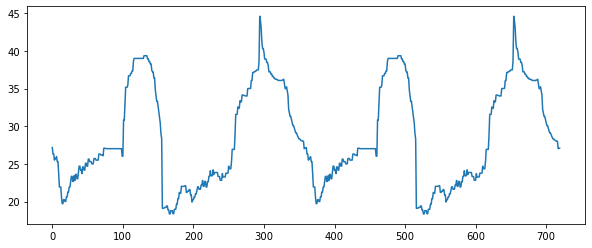

In [27]:
fig = plt.figure(figsize=(10,4))
pd.Series(distances).plot()

In [ ]:
df_3.to_csv('region_3_ts.csv', index=False)